# P7: Predictive ML Project — Simple Linear Regression  
**Author:** Abdellah Boudlal
**Date:** 2025-10-04  

**Project Repository:** *(https://github.com/Aboudlal/datafun-07-ml)*

---

This notebook implements the required parts:

- **Part 1** — Chart a straight line (Celsius vs Fahrenheit)  
- **Part 2** — Predict NYC January average high temperature using SciPy `linregress`  
- **Part 3** — Predict NYC January average high temperature using scikit-learn (train/test split)  
- **Part 4** — Insights comparing both approaches  

> Tip: Run **Kernel → Restart & Run All** before committing to GitHub.

In [3]:
# Imports (keep all imports together at the top)
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns

# Visualization (project allows seaborn; tool rule here: we demonstrate matplotlib only)
import matplotlib.pyplot as plt

# Stats & ML
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing

## Part 1 — Chart a Straight Line

We revisit the line equation **y = m x + b** using the Celsius–Fahrenheit conversion:
- **m (slope)** = 9/5  
- **b (intercept)** = 32

In [4]:
# Create Celsius values and compute Fahrenheit using y = m x + b
c_values = np.arange(-20, 51, 5)  # -20°C to 50°C step 5
m = 9/5
b = 32
f_values = m * c_values + b

df_cf = pd.DataFrame({'Celsius': c_values, 'Fahrenheit': f_values})
df_cf.head()


,Celsius,Fahrenheit
0,-20,-4.0
1,-15,5.0
2,-10,14.0
3,-5,23.0
4,0,32.0


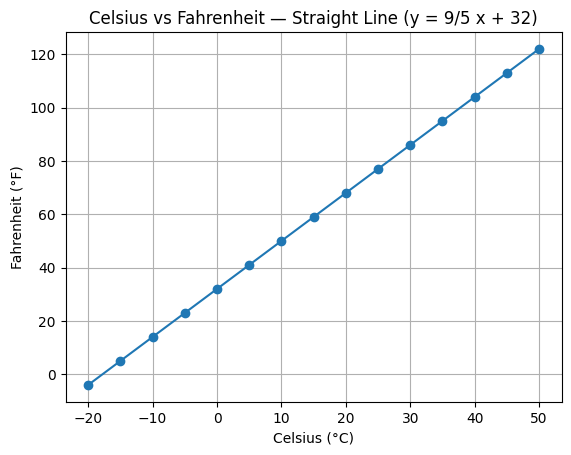

In [5]:
# Plot the straight line (Celsius vs Fahrenheit)
plt.figure()
plt.plot(df_cf['Celsius'], df_cf['Fahrenheit'], marker='o')
plt.title('Celsius vs Fahrenheit — Straight Line (y = 9/5 x + 32)')
plt.xlabel('Celsius (°C)')
plt.ylabel('Fahrenheit (°F)')
plt.grid(True)
plt.show()

## Part 2: Predict Avg High Temp in NYC in January using scipy

#### Section 1 - Data Acquisition
#### Loading the Average High Temperature in NYC in Jan data into a DataFrame

In [6]:
nyc_df = pd.read_csv('data/ave_hi_nyc_jan_1895-2018.csv')

#### Section 2 - Data Inspection

In [7]:
nyc_df.head()
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


#### Section 3 - Data Cleaning

In [8]:
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']
nyc_df.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


#### Truncate the last two digits of the date column

In [9]:
nyc_df.Date = nyc_df.Date.floordiv(100)
nyc_df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


#### Section 4 - Descriptive Statistics
##### Calculating Basic Descriptive Statistics for the Dataset

In [10]:
pd.set_option('display.float_format', '{:.2f}'.format)
nyc_df.describe()

,Date,Temperature,Anomaly
count,124.00,124.00,124.00
mean,1956.50,37.60,0.20
std,35.94,4.54,4.54
min,1895.00,26.10,-11.30
25%,1925.75,34.58,-2.82
50%,1956.50,37.60,0.20
75%,1987.25,40.60,3.20
max,2018.00,47.60,10.20


#### Section 5 - Build the Model

In [11]:
linear_regression = stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)
linear_regression.slope

np.float64(0.014771361132966163)

In [12]:
linear_regression.intercept

np.float64(8.694993233674289)

#### Section 6 - Predict
#### Forecasting Future January Average High Temperatures

In [13]:
linear_regression.slope * 2024 + linear_regression.intercept

np.float64(38.5922281667978)

#### Section 7 - Visualizations
#### Plotting the Average High Temperatures and a Regression Line

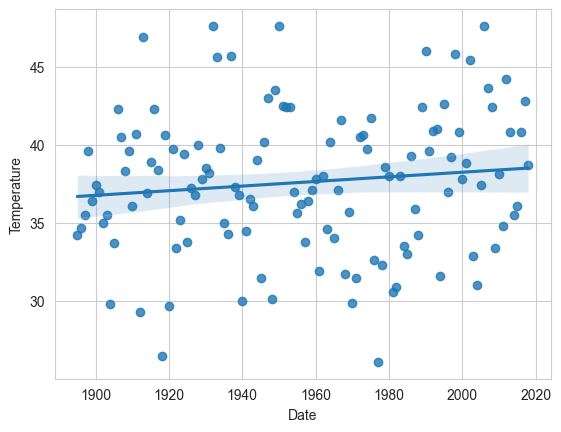

In [14]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)

### Part 3: Predict Avg High Temp in NYC in January using Scikit Learn
##### Section 1 - Build the Model

In [15]:
X_train, X_test, y_train, y_test = train_test_split(nyc_df.Date.values.reshape(-1, 1), 
nyc_df.Temperature.values,
random_state=11)

#### Shape of Training data set

In [16]:
X_train.shape

(93, 1)

#### Shape of Testing data set

In [17]:
X_test.shape

(31, 1)

#### Build a Linear Regression Model

In [18]:
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


#### Display Coefficient

In [19]:

linear_regression.coef_

array([0.01939167])

#### Display intercept

In [20]:
linear_regression.intercept_

np.float64(-0.30779820252656975)

#### Section 2 - Test the Model

In [21]:
predicted = linear_regression.predict(X_test)
expected = y_test
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


#### Section 3: Predict

In [23]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)
predict(2024)

array([38.94094855])

#### Section 4 - Visualizations
##### Scatter Plot

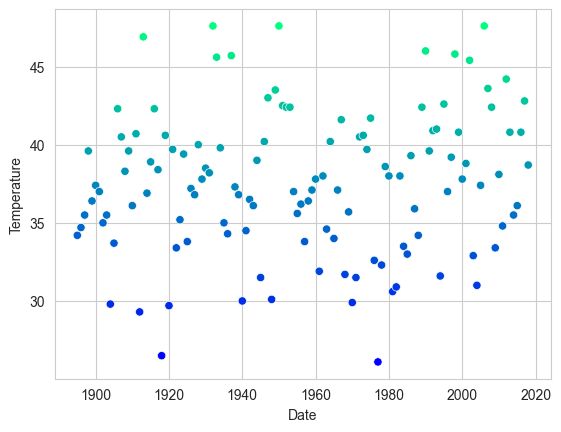

In [ ]:
axes = sns.scatterplot(data=nyc_df, x='Date', y='Temperature',
hue='Temperature', palette='winter', legend=False)

## Part 4: Insights  

In **Chapter 10**, we used *Simple Linear Regression (SLR)* to predict future temperatures with time series data.  
The dataset covered the years **1895 to 2018** and included the average high temperatures in January for New York City.  
With this method, we built a model that predicted:  

- **38.59°F** for January 2024  
- **36.61°F** for 1890  

In **Chapter 15**, we repeated the SLR approach but applied the **scikit-learn estimator**.  
By using the slope and intercept provided by the model, we obtained slightly different forecasts:  

- **38.94°F** for January 2024  
- **36.61°F** again for 1890  

---

### Comparison of the two approaches  
The graphs revealed small differences between both models.  
- The traditional SLR uses a simple line to show a gradual year-to-year change.  
- The scikit-learn estimator, however, can capture more details depending on the algorithm used.  

Even if scikit-learn is more complex, it can reflect more subtle patterns in the dataset.  

---

### Dataset insights  
Both models highlight the same overall trend: a **steady rise in temperatures over time**.  
The forecasts suggest that in about **200 years**, the average January high in NYC could rise by **10°F**, showing the clear effect of **climate change**.  

---

### Personal observation  
I noticed that the regression lines are different because of the slope and intercept values:  
- The **slopes** from Part 2 and Part 3 are close, with only small differences.  
- The **intercepts**, however, are very different, which explains the bigger variation between the two lines.  

